DE CORDOUE-HECQUARD Grégoire 2508857

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

sns.set_theme()
df = pd.read_csv("BostonHousing.csv")
df.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
224,0.31533,0.0,6.20,0,0.504,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
442,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666,20.2,395.69,16.59,18.4
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,395.99,12.86,22.5
457,8.20058,0.0,18.10,0,0.713,5.936,80.3,2.7792,24,666,20.2,3.50,16.94,13.5
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27,13.4


# Functions

In [13]:
def plot_distribution(col):
    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20, 4))
    sns.kdeplot(data=df, x=col, ax=ax[0])
    sns.boxplot(data=df, x=col, ax=ax[1])

# A) Distributions 

1. Describe the distribution of `medv`

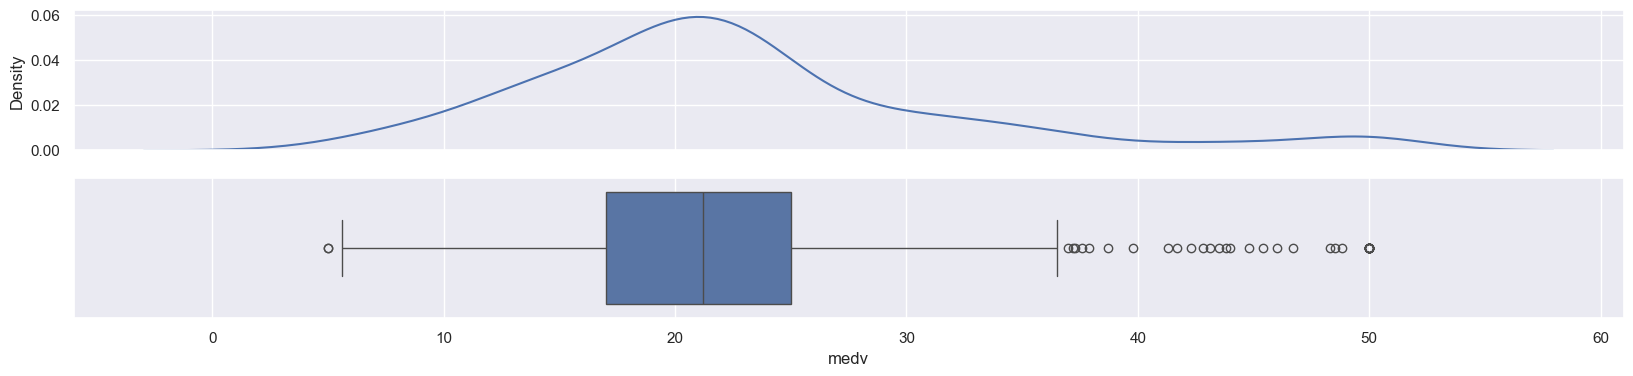

In [354]:
plot_distribution("medv")

The 'medv' here corresponds to the median value of owner-occupied homes in $1000's.  
According to the boxplot, the median value of medv is around 21. We notice many outliers on the right side, indicating that the values are dispersed (mostly on the higher end). The data set is slightly left-skewed (negatively skewed) as indicated on the boxplot and kde plot. This tells us that most of the homes are moderately valued with some very low values skewing the data to the left. We also notice some very high-valued homes, represented by the outliers on the right. 

2. Describe the distributions of `rm`, `lstat`, `crim`, `nox`; note which are skewed (right/left). 

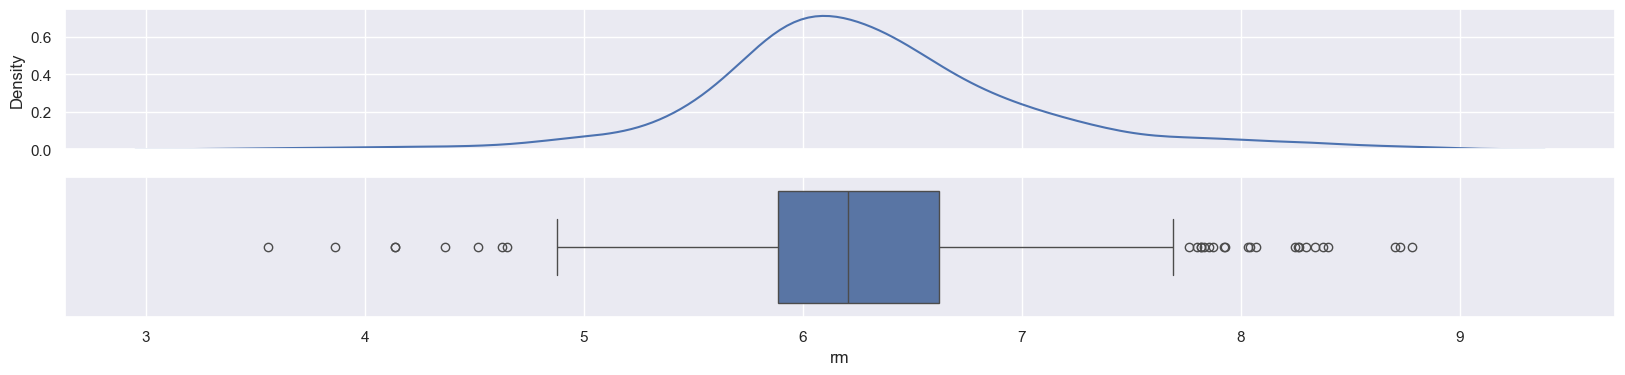

In [358]:
plot_distribution("rm")

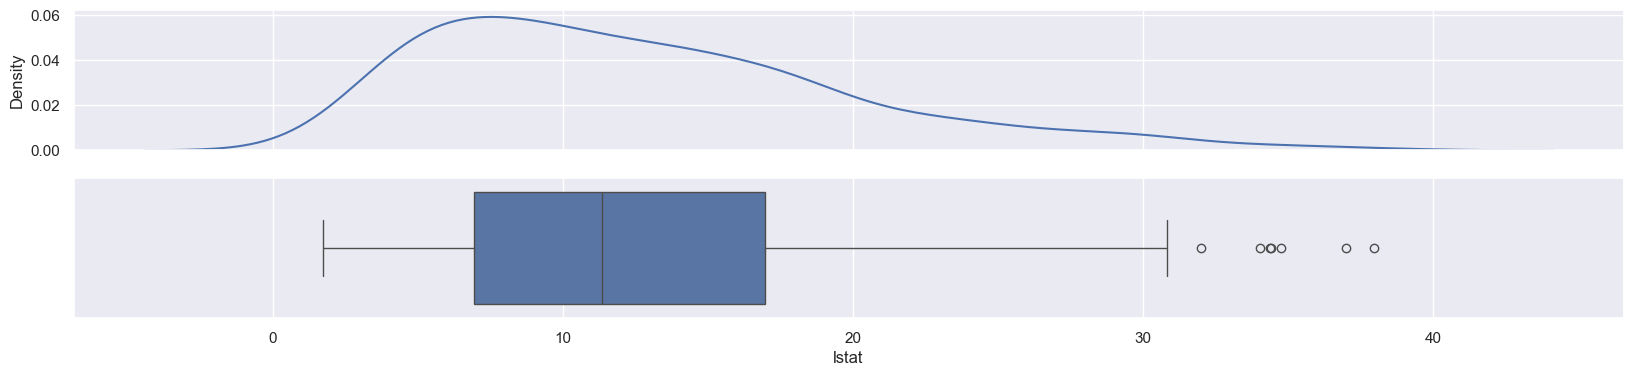

In [360]:
plot_distribution("lstat")

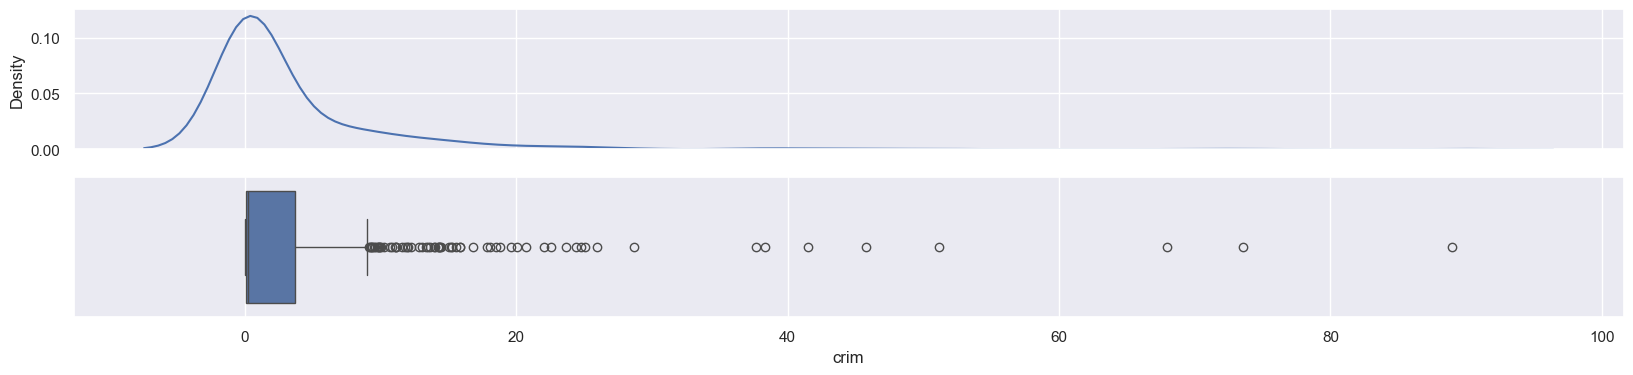

In [362]:
plot_distribution("crim")

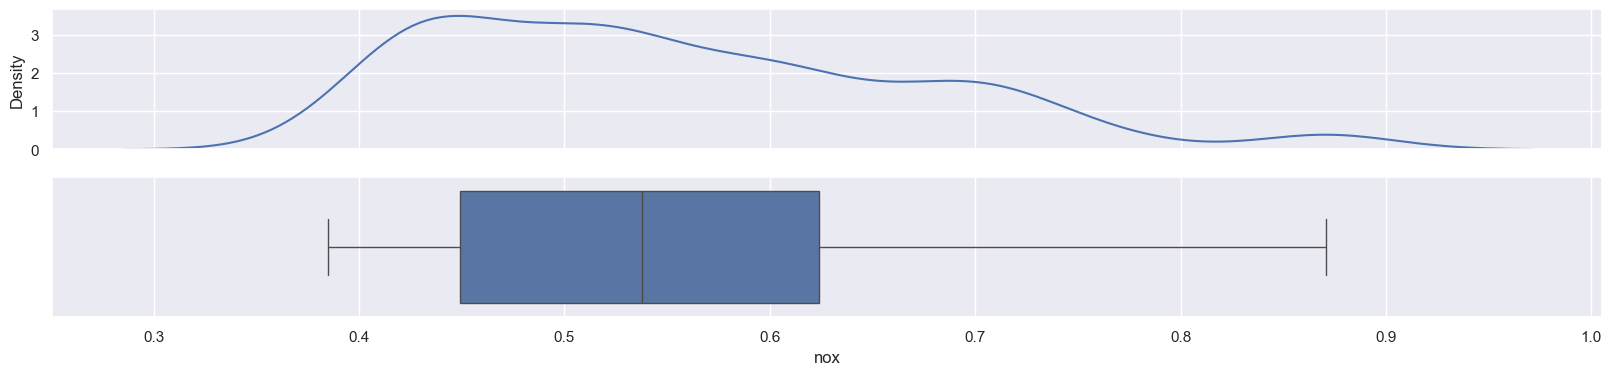

In [364]:
plot_distribution("nox")

* **The 'rm' here represents the average number of rooms per dwelling**. The median is at 6.2 approximately. The distribution is **symmetric** as shown on the kde plot. We also observe many outliers on the right side of the boxplot, with only a few on the left side. Consequently, we can safely assume that most houses contain between 6 to 7 rooms with a few extreme values on both sides.
  
* **The 'lsat' herer represents the percentage lower status of the population**. The median is at 11% approximately. The distribution is also **right-skewed**, and the data is quite dispersed. One may also notice a few outliers on the right side, meaning that most of the data is around the median (in range). Overall, most people fall around the 11%, but a few fall at extreme values (like 30%) which skews our distribution positively.
  
* **The 'crim' here represents the per capita crime rate by town**. The median value is at approximately 0.5%. Let us immediately note the vast number of outliers on the right side, indicating that the values are very dispersed. Most of the values are above the 3rd quartile (\~4%). The distribution is **right-skewed**. Therefore, while the median value for crime rate is at only 0.5%, there is in fact a inequal distribution of this rate amongst all the towns, as some have extreme values (\~90%) that aren't represented by the median.
  
* **The 'nox' here represents the nitric oxides concentration (parts per 10 million)**. The median is at nearly 0.55. There are no outliers, all data is in range. The distribution is **right-skewed** as well. We can conclude that the concentrations over all towns are mostly around 0.55, with some extreme values (within range) that skew our distribution positively.

Let us note that, since most of the kde plots aren't perfectly bell-shaped and are skewed, we should normalize our data by removing outliers or use a transformation like logarithmic or square root transformations.


# B) Comparison

3. Compare the average `medv` for homes adjacent to the river `chas` (=1 versus =0).

,chas,avg_medv
0,0,22.09
1,1,28.44


<Axes: xlabel='chas', ylabel='avg_medv'>

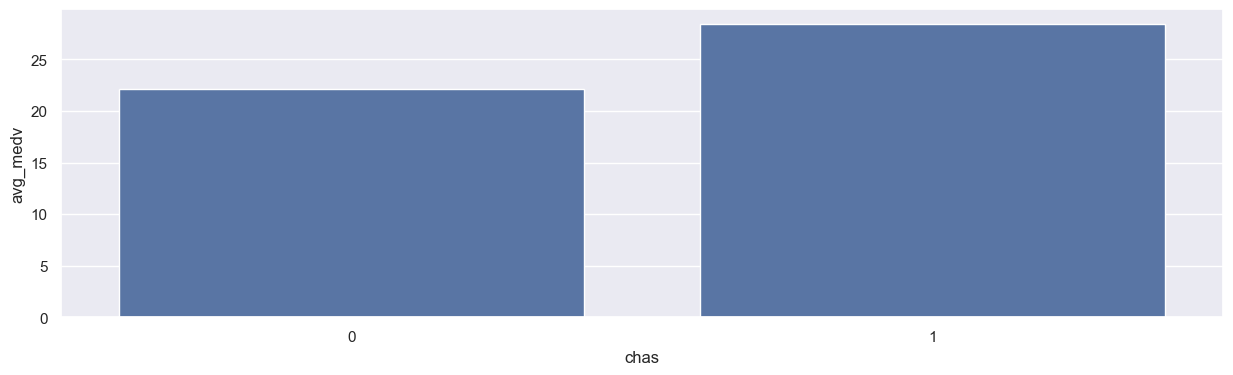

In [8]:
# do not run this cell

In [ ]:
# write your code here

In [37]:
df_adj = df.groupby(by="chas")["medv"].mean().round(2).reset_index(name="avg_medv")
df_adj

,chas,avg_medv
0,0,22.09
1,1,28.44


<Axes: xlabel='chas', ylabel='avg_medv'>

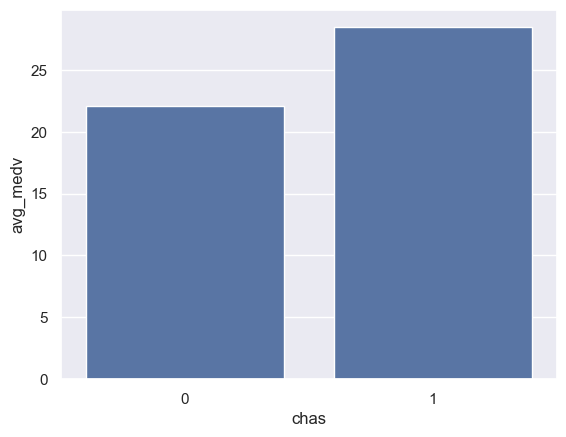

In [57]:
sns.barplot(data=df_adj, x="chas", y="avg_medv")

4. Compare median `medv` across `rm` bins (<6, 6-7, and >7 rooms); describe the trend.

,rm_binned,median_medv
0,<6,18.40
1,6-7,22.20
2,>7,36.45


<Axes: xlabel='rm_binned', ylabel='median_medv'>

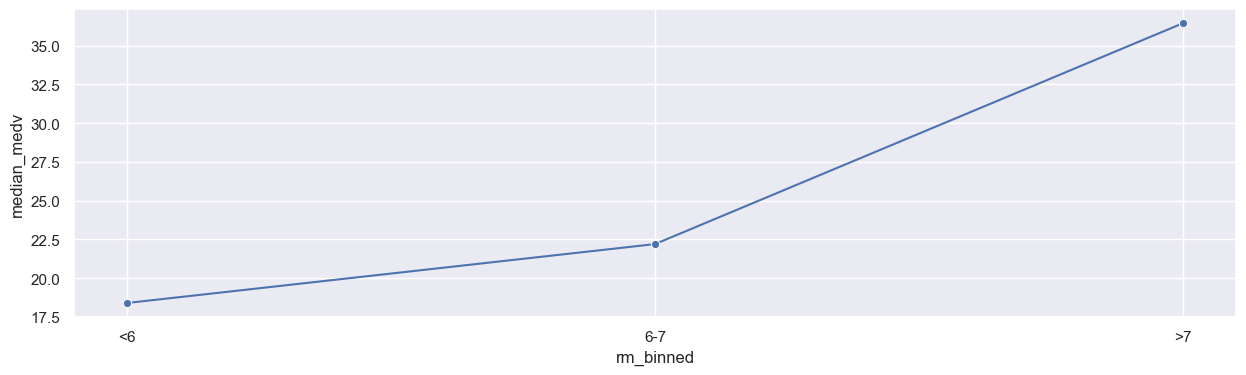

In [9]:
# do not run this cell

In [ ]:
# write your code here

In [65]:
bins = [0, 6, 7, df["rm"].max()]
labels = "<6 6-7 >7".split()

df["rm_binned"] = pd.cut(x=df["rm"], bins=bins, labels=labels)

df_rmb = df.groupby(by="rm_binned", observed=False)["medv"].median().reset_index(name="median_medv")
df_rmb

,rm_binned,median_medv
0,<6,18.40
1,6-7,22.20
2,>7,36.45


<Axes: xlabel='rm_binned', ylabel='median_medv'>

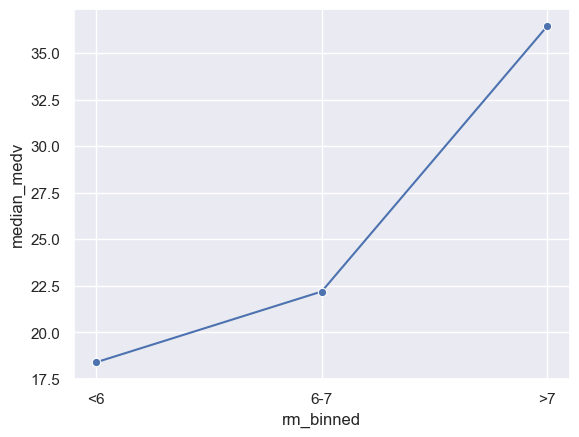

In [69]:
sns.lineplot(data=df_rmb, x="rm_binned", y="median_medv", marker="o")

# C) Correlation

5. Compute correlations of `medv` with all numeric features; identify the top two strongest

In [10]:
# do not run this cell

['lstat', 'rm']

In [ ]:
# write your code here

In [114]:
num_col = ["crim", "zn", "indus", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b", "lstat"]
max_corr = 0
ind = 0
lab = ""
strongest = []
for _ in range(2):
    for col in range(len(num_col)):
        corr = abs(df["medv"].corr(df[num_col[col]]))
        if max_corr < corr:
            max_corr = corr
            ind = col
            lab = num_col[col]
            
    max_corr = 0
    num_col.pop(ind)
    ind = 0
    strongest.append(lab)

strongest

['lstat', 'rm']

# D) Ranking

6. Among the observations with `medv < 50`, list the top 5 along with their `rm` and `lstat` values.

In [11]:
# do not run this cell

,medv,rm,lstat
262,48.8,8.398,5.91
203,48.5,7.853,3.81
233,48.3,8.247,3.95
228,46.7,7.686,3.92
282,46.0,7.645,3.01


In [ ]:
# write your code here

In [144]:
df_medv_thre = df[df["medv"] < 50]
df_medv_thre.groupby(by="medv")[["rm", "lstat"]].max().sort_values(by="medv", ascending=False).head().reset_index()

,medv,rm,lstat
0,48.8,8.398,5.91
1,48.5,7.853,3.81
2,48.3,8.247,3.95
3,46.7,7.686,3.92
4,46.0,7.645,3.01


# E) Frequency

7. Report frequency counts (and %) for `rad` categories; which value(s) dominate?

,rad,counts
0,24,132
1,5,115
2,4,110
3,3,38
4,6,26
5,2,24
6,8,24
7,1,20
8,7,17


<Axes: xlabel='rad', ylabel='count'>

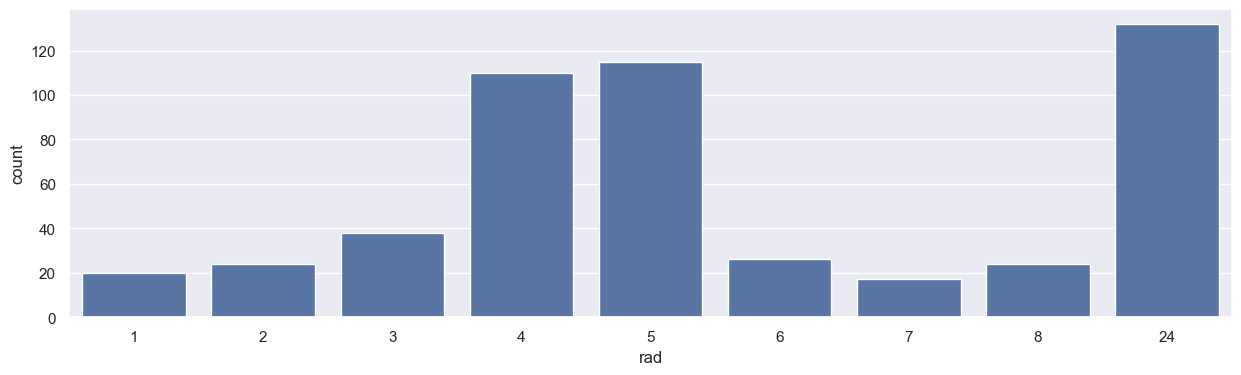

In [12]:
# do not run this cell

In [ ]:
# write your code here

In [220]:
df_rad = df["rad"].value_counts().reset_index()
df_rad

,rad,count
0,24,132
1,5,115
2,4,110
3,3,38
4,6,26
5,2,24
6,8,24
7,1,20
8,7,17


<Axes: xlabel='rad', ylabel='count'>

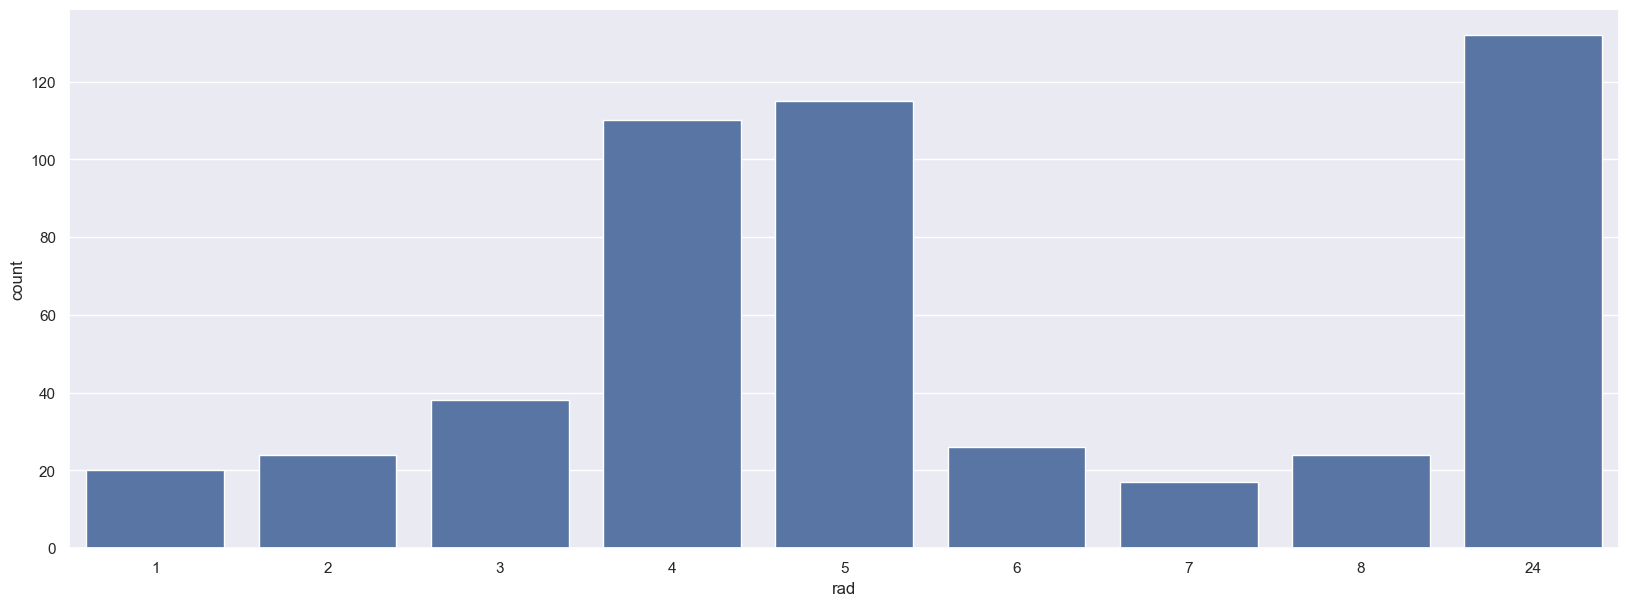

In [228]:
plt.figure(figsize=(20,7))
sns.barplot(data=df_rad, x="rad", y="count")

# F) Contribution

8. Compute each `rad` category’s share of total `medv` (as % of the sum); which categories contribute the most?

,rad,contribution (%)
0,5,25.93
1,4,20.63
2,24,18.99
3,3,9.31
4,8,6.39
5,2,5.65
6,6,4.78
7,1,4.27
8,7,4.04


<Axes: xlabel='rad', ylabel='contribution (%)'>

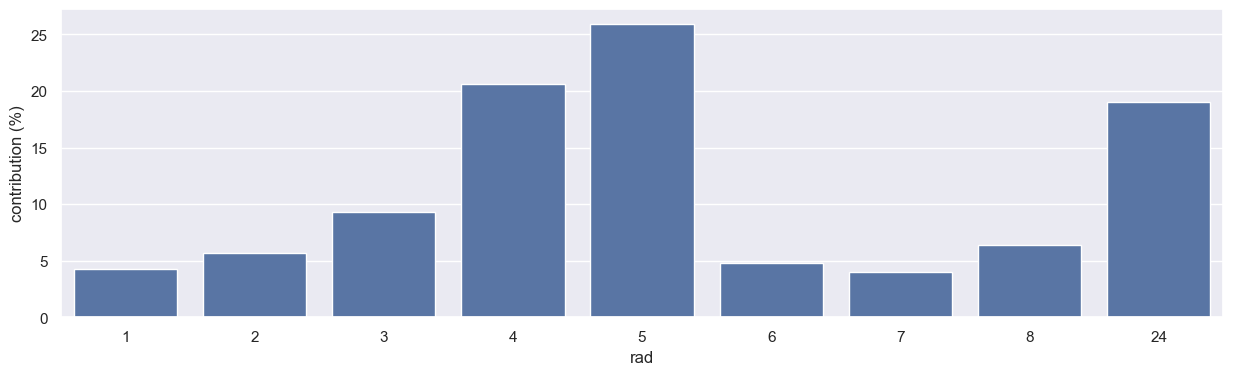

In [13]:
# do not run this cell

In [ ]:
# write your code here

In [240]:
df_rad_share = df.groupby(by="rad")["medv"].sum().div(df["medv"].sum()).mul(100).round(2).sort_values(ascending=False).reset_index(name="contribution (%)")
df_rad_share

,rad,contribution (%)
0,5,25.93
1,4,20.63
2,24,18.99
3,3,9.31
4,8,6.39
5,2,5.65
6,6,4.78
7,1,4.27
8,7,4.04


<Axes: xlabel='rad', ylabel='contribution (%)'>

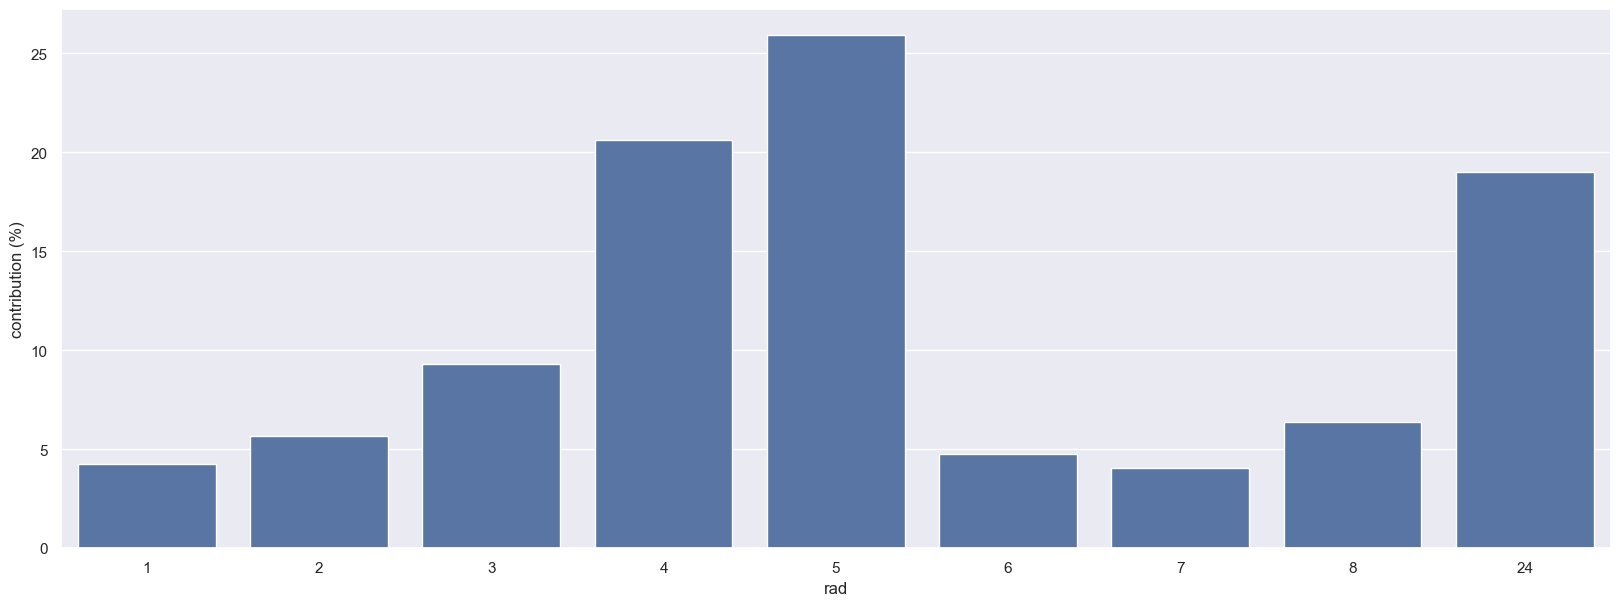

In [244]:
plt.figure(figsize=(20,7))
sns.barplot(data=df_rad_share, x="rad", y="contribution (%)")

# G) Pareto

9. Compute each observation’s share of total `medv`; what percentage of total value is contributed by the top 10% of houses?

In [14]:
# do not run this cell

51 observations (top 10% by MEDV) contribute 19.29% of the total MEDV.


In [ ]:
# write your code here

In [45]:
df["medv_share"] = (df["medv"]/(df["medv"].sum()))*100
nb_obs = int(round(0.1*len(df), 0))

top = df.sort_values('medv', ascending=False).head(nb_obs)
top.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,medv_share
283,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0,0.438535
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0,0.438535
369,5.66998,0.0,18.10,1,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0,0.438535
370,6.53876,0.0,18.10,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0,0.438535
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0,0.438535


In [414]:
contribution = round((top["medv"].sum()/df["medv"].sum())*100, 2)
print(f"{nb_obs} observations (top 10% by MEDV) contribute {contribution}% of the total MEDV.")

51 observations (top 10% by MEDV) contribute 19.29% of the total MEDV.


10. Sort observations by `medv` and find the smallest fraction of houses needed to reach 80% of total `medv` (report that fraction).

In [15]:
# do not run this cell

452 observations (0.9%) account for 80% of total MEDV.


In [ ]:
# write your code here

In [463]:
medv_sort = df.sort_values('medv', ascending=False)
medv_sort

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,medv_share
283,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0,0.438535
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0,0.438535
369,5.66998,0.0,18.10,1,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0,0.438535
370,6.53876,0.0,18.10,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0,0.438535
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0,0.438535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0,0.061395
399,9.91655,0.0,18.10,0,0.693,5.852,77.8,1.5004,24,666,20.2,338.16,29.97,6.3,0.055255
400,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6,0.049116
398,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0,0.043853


In [467]:
medv_sort["medv % cumsum"] = medv_sort["medv_share"].cumsum()
medv_share = medv_sort[medv_sort["medv % cumsum"] <= 80]
medv_share

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,medv_share,medv % cumsum
283,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0,0.438535,0.438535
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0,0.438535,0.877070
369,5.66998,0.0,18.10,1,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0,0.438535,1.315605
370,6.53876,0.0,18.10,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0,0.438535,1.754140
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0,0.438535,2.192675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9,0.165766,79.206427
112,0.12329,0.0,10.01,0,0.547,5.913,92.9,2.3534,6,432,17.8,394.95,16.21,18.8,0.164889,79.371316
124,0.09849,0.0,25.65,0,0.581,5.879,95.8,2.0063,2,188,19.1,379.38,17.58,18.8,0.164889,79.536205
340,0.06151,0.0,5.19,0,0.515,5.968,58.5,4.8122,5,224,20.2,396.90,9.29,18.7,0.164012,79.700218


In [469]:
prop = round(100*(len(medv_share)/len(medv_sort)), 2)
n_obs = len(medv_share)
print(f"{n_obs} observations ({prop}%) account for 80% of total MEDV.")

341 observations (67.39%) account for 80% of total MEDV.
